<a href="https://colab.research.google.com/github/jnunez03/GoogleColabRepo/blob/main/cooking_segmentation_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
from scipy import stats
from scipy.stats import norm
from fbprophet import Prophet
import logging

logger = logging.getLogger('pandas_gbq')
logger.propagate = False 
logging.getLogger().disabled = True

q = """
SELECT *
FROM `nunez_justin.CK_seg_3` a
LEFT JOIN `nunez_justin.Retention2019_New` b on a.month = b.start_month and cast(b.DssorRegi as string) = a.dssor_regi_id -- a.month is sub start month 
WHERE b.usageRegi is not null and pv_regi_id is not null and regi_id is not null 
and  month >= '2019-01-01'
and month < '2020-02-01'
"""
# importing the data
df = pd.read_gbq(q,
    project_id = 'nyt-bigquery-beta-workspace',
    dialect='standard')

# Descriptive statistics, data type, data preview 
print(df.describe(), ' \n \n', '*Data Types Below* \n \n', df.dtypes ,' \n \n', df.head(n=10))

INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server unavailable.


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=rumC6awFQmOxTGLs3zQhbYT9nm6BVG&prompt=consent&access_type=offline
Enter the authorization code: 4/wQFN9PcTZ-FQ5JWvNGaP_uLDto2UaK9slAGHhMfiI0ayBr-RW6JAvdM
       distinct_days  distinct_weeks  ...       Four_14D   FivePlus_14D
count  254110.000000   254110.000000  ...  254110.000000  254110.000000
mean        5.356790        2.631707  ...       0.121140       0.363221
std         4.271343        1.300995  ...       0.326291       0.480929
min         1.000000        1.000000  ...       0.000000       0.000000
25%         2.000000        2.000000  ...       0.000000       0.000000
50%         4.000000        2.000000  ...       0.000000       0.000000
75%         7.000000        4.000

In [ ]:
pandas_profiling.ProfileReport(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pearsoncorr = df.corr(method='pearson')
pearsoncorr

distinct_days  distinct_weeks  ...  Four_14D  FivePlus_14D
distinct_days            1.000000        0.802589  ... -0.009824      0.629906
distinct_weeks           0.802589        1.000000  ...  0.074471      0.462826
Sessions                 0.882875        0.639253  ... -0.029114      0.564023
PageViews                0.488365        0.317985  ... -0.028087      0.333672
distinct_Urls            0.271265        0.207600  ... -0.007298      0.176762
flag_Web                 0.194745        0.223623  ...  0.031880      0.124491
Days_Web                 0.767289        0.658117  ...  0.003805      0.459622
flag_mWeb                0.219487        0.223570  ...  0.028813      0.154670
days_mWeb                0.589702        0.490611  ... -0.000147      0.351778
flag_iOS                 0.087551        0.037881  ...  0.005593      0.127107
Days_iOS                 0.570452        0.386645  ... -0.025110      0.397163
RecipeBox_Flag           0.225130        0.190502  ...  0.006188      0.164554
Days_recipebox           0.301832        0.216397  ... -0.011244      0.200425
Urls_RecipeBox           0.196300        0.138516  ... -0.009250      0.135889
Email_Flag               0.303924        0.329592  ...  0.022558      0.193473
Days_Email               0.470480        0.408165  ... -0.012733      0.270854
Pages_Email              0.386793        0.325845  ... -0.015509      0.222246
HP_Flag                  0.173477        0.187803  ...  0.026372      0.113223
Days_HP                  0.433642        0.345988  ... -0.000224      0.273769
Pg_search_flag           0.059330        0.056595  ...  0.006642      0.036229
Days_Pg_search           0.068634        0.061942  ...  0.008438      0.041033
Pages_Pg_search          0.051792        0.045689  ...  0.009436      0.029840
Og_search_flag           0.200481        0.213025  ...  0.024544      0.116825
Days_Og_search           0.317514        0.289396  ...  0.012630      0.188044
Pages_Og_search          0.234803        0.207639  ...  0.005388      0.136086
social_flag              0.134091        0.139434  ...  0.008668      0.072178
Days_social              0.220736        0.176943  ... -0.004906      0.112855
Pages_social             0.151046        0.109725  ... -0.007009      0.074799
Days_collections         0.446322        0.362631  ... -0.003248      0.291718
CollctionFlag            0.281815        0.277761  ...  0.026404      0.204529
Days_SS                  0.188866        0.141139  ... -0.004211      0.131639
SS_Flag                  0.150308        0.124341  ...  0.001747      0.115669
Days_IG                  0.040752        0.034028  ...  0.000294      0.025320
IG_Flag                  0.041334        0.034913  ...  0.000477      0.026002
Days_Guides              0.306420        0.217094  ... -0.009045      0.224047
Guides_flag              0.240414        0.186107  ...  0.004439      0.193623
Recipes_flag             0.195859        0.239391  ...  0.030363      0.109830
Days_Recipes             0.720684        0.624688  ...  0.003295      0.423796
days_save_ios            0.458205        0.296303  ... -0.026926      0.330131
saveIos_Flag             0.199882        0.134917  ...  0.012680      0.216690
days_cook_mode           0.447649        0.294111  ... -0.019607      0.321835
cookmode_Flag            0.083608        0.035168  ...  0.009992      0.120405
ios_GL_Flag              0.148526        0.082510  ... -0.002277      0.145026
days_ios_GL              0.192330        0.103687  ... -0.014895      0.156761
add_GL_web_flag          0.060770        0.037407  ...  0.005181      0.051983
open_GL_web_flag         0.067550        0.038710  ...  0.005683      0.059639
Web_Save_Flag            0.230823        0.218873  ...  0.015740      0.162514
web_saves                0.430087        0.332318  ... -0.012383      0.267517
days_saved_web           0.449430        0.352406  ... -0.012338      0.275014
days_watched_video            NaN             NaN  ...       NaN      

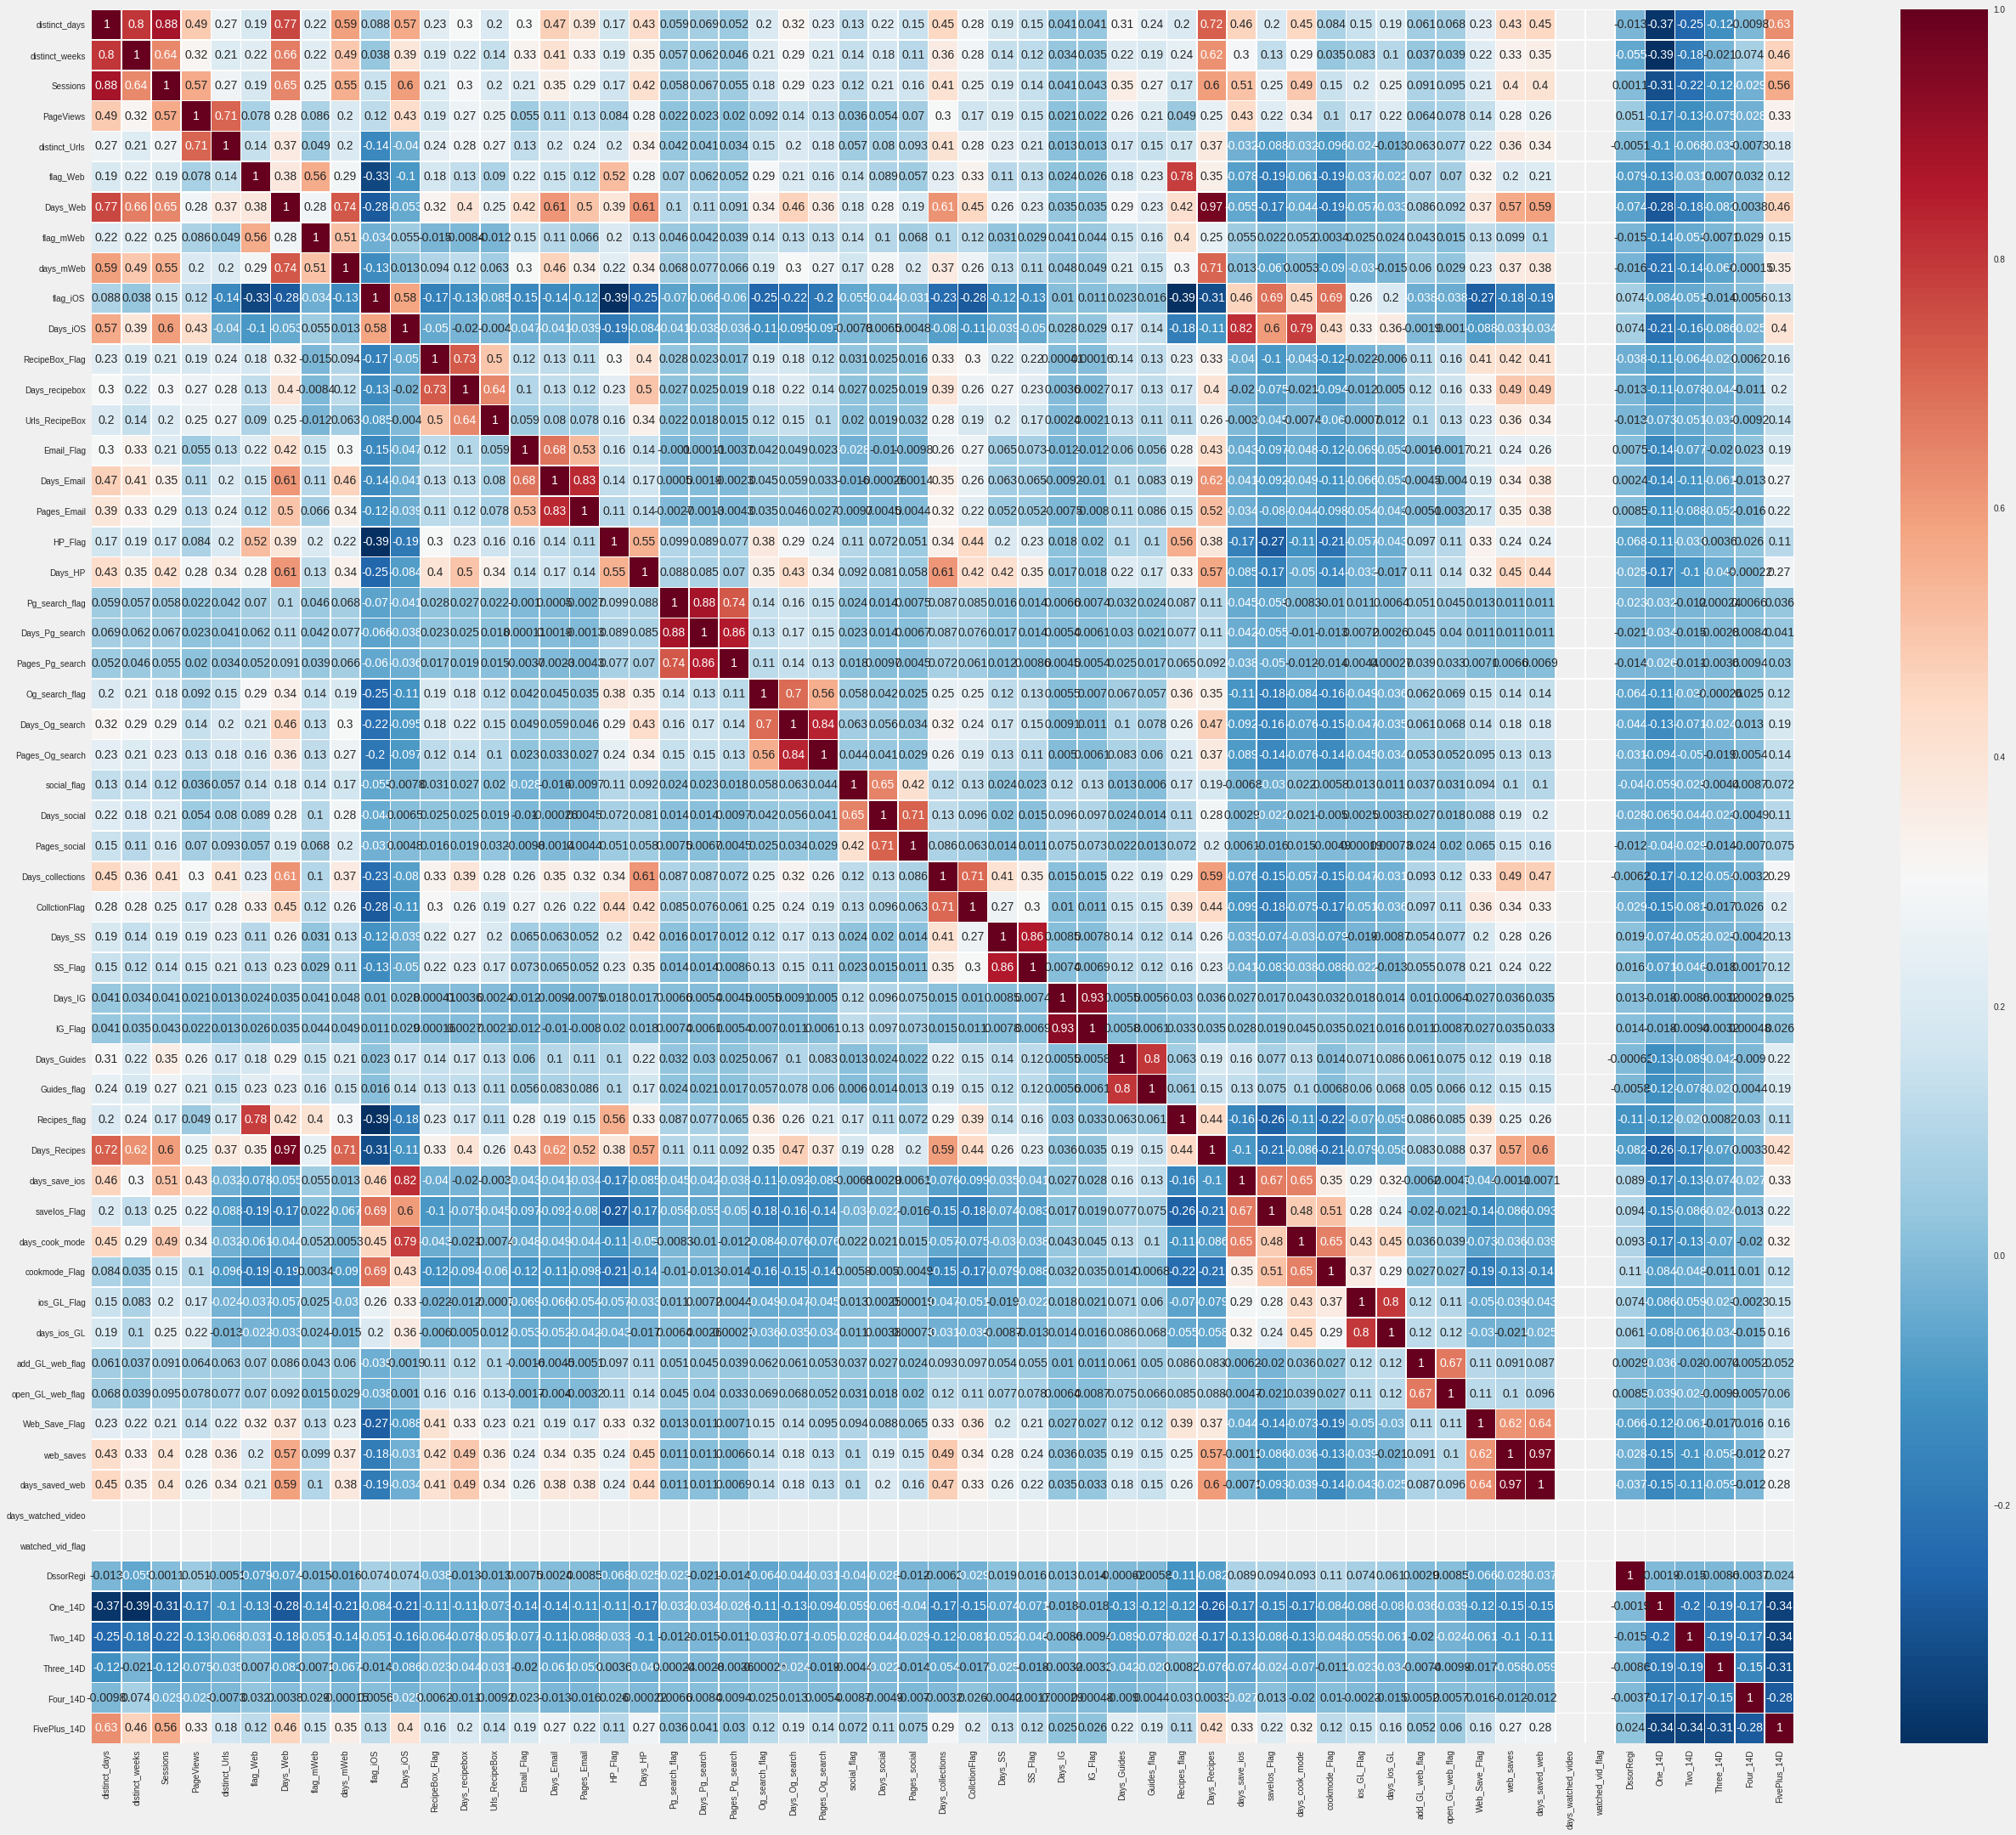

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')   #bmh, ggplot,seaborn-notebook,seaborn-deep,dark_background
rcParams['figure.figsize'] = 40,35
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.6)

In [ ]:
#df1.days_add_GL_web.value_counts()
#df1.head(n=50)
print(
df.groupby("One_14D")['Sessions'].mean(),
df.groupby("Two_14D")['Sessions'].mean(),
df.groupby("Three_14D")['Sessions'].mean(),
df.groupby("Four_14D")['Days_Email'].mean(),
df.groupby("FivePlus_14D")['Days_Email'].mean())

One_14D
0    10.659634
1     3.018016
Name: Sessions, dtype: float64 Two_14D
0    10.265325
1     4.819182
Name: Sessions, dtype: float64 Three_14D
0    9.810557
1    6.683927
Name: Sessions, dtype: float64 Four_14D
0    0.925840
1    0.838222
Name: Days_Email, dtype: float64 FivePlus_14D
0    0.455918
1    1.720460
Name: Days_Email, dtype: float64


In [ ]:
print(
df.groupby("One_14D")['DssorRegi'].count(),
df.groupby("Two_14D")['DssorRegi'].count(),
df.groupby("Three_14D")['DssorRegi'].count(),
df.groupby("Four_14D")['DssorRegi'].count(),
df.groupby("FivePlus_14D")['DssorRegi'].count())

One_14D
0    210538
1     43572
Name: DssorRegi, dtype: int64 Two_14D
0    211371
1     42739
Name: DssorRegi, dtype: int64 Three_14D
0    216625
1     37485
Name: DssorRegi, dtype: int64 Four_14D
0    223327
1     30783
Name: DssorRegi, dtype: int64 FivePlus_14D
0    161812
1     92298
Name: DssorRegi, dtype: int64
